In [1]:
import os
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from numpy import genfromtxt
from sklearn.decomposition import PCA

load_diagrams = True

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
datafolder = "new_data/"

In [3]:
all_files = os.listdir(datafolder)
names = [os.path.splitext(file)[0] for file in all_files if file.endswith('.csv')]
names_k8 = [nm for nm in names if 'K8' in nm]
names_k14 = [nm for nm in names if 'K14' in nm]
names_datasets = {'K8':names_k8, 'K14':names_k14}

In [4]:
datasets = {}
for nm_dt in names_datasets:
    data = {}
# Load each CSV file and store the points in the dictionary
    for nm in names_datasets[nm_dt]:
        pts = genfromtxt(datafolder + nm + '.csv', delimiter=',')
        data[nm] = pts
    datasets[nm_dt] = data

In [5]:
import pickle
if not load_diagrams:
    diagrams = {}
    for nm_dt in names_datasets:
        dgms = {}
    # Compute diagrams for each point set
        for nm in names_datasets[nm_dt]:
            ac = gd.AlphaComplex(points=datasets[nm_dt][nm])       # Initialize the alpha complex
            st = ac.create_simplex_tree()          # Compute the alpha filtration
            st.compute_persistence()
            dgm0, dgm1 = st.persistence_intervals_in_dimension(0), st.persistence_intervals_in_dimension(1)
            dgms[nm] = (dgm0, dgm1)
        diagrams[nm_dt] = dgms
else:
    with open('saved_computations/diagrams.p', 'rb') as fp:
        diagrams = pickle.load(fp)

In [6]:
print(diagrams)

{'K8': {'NB_K8_mask_r': (array([[0.0000e+00, 2.5000e-01],
       [0.0000e+00, 2.5000e-01],
       [0.0000e+00, 2.5000e-01],
       ...,
       [0.0000e+00, 1.3985e+03],
       [0.0000e+00, 1.4125e+03],
       [0.0000e+00,        inf]]), array([[1.25000000e+00, 1.38888889e+00],
       [1.25000000e+00, 1.38888889e+00],
       [1.25000000e+00, 1.38888889e+00],
       ...,
       [8.84000000e+02, 7.56558065e+03],
       [5.17250000e+02, 9.72283583e+03],
       [8.45000000e+01, 2.39370868e+04]])), 'P7_K8_mask': (array([[0.00000e+00, 2.50000e-01],
       [0.00000e+00, 2.50000e-01],
       [0.00000e+00, 2.50000e-01],
       ...,
       [0.00000e+00, 2.71125e+03],
       [0.00000e+00, 4.95400e+03],
       [0.00000e+00,         inf]]), array([[1.25000000e+00, 1.38888889e+00],
       [1.25000000e+00, 1.38888889e+00],
       [1.25000000e+00, 1.38888889e+00],
       ...,
       [1.25320000e+04, 1.27224077e+04],
       [1.64420000e+04, 1.65144819e+04],
       [7.22500000e+01, 1.69412501e+04]])), 'E

In [7]:
if not load_diagrams:
    try:
        import cPickle as pickle
    except ImportError:  # Python 3.x
        import pickle

    with open('saved_computations/diagrams.p', 'wb') as fp:
        pickle.dump(diagrams, fp, protocol=pickle.HIGHEST_PROTOCOL)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

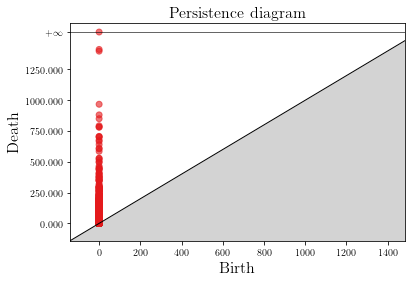

In [8]:
dgm = diagrams['K8']['NB_K8_mask_r']
gd.plot_persistence_diagram(dgm[0])

In [9]:
homological_degree = 1
# for nm_dt in names_datasets:
#     for nm in names_datasets[nm_dt]:
#         plt.figure()
#         fig = gd.plot_persistence_diagram(diagrams[nm_dt][nm][1])
#         plt.title(nm + 'for H_'+str(homological_degree))
#         plt.show()

In [10]:
def extract_age(name):
    return name.split('_')[0]

In [11]:
age_to_color = {}
for nm_dt, names in names_datasets.items():
    # Get unique ages
    unique_ages = list(set(extract_age(name) for name in names))

    # Create a color map based on unique ages
    cmap = cm.get_cmap('viridis', len(unique_ages))
    age_to_color[nm_dt] = {age: cmap(i) for i, age in enumerate(unique_ages)}
    

/tmp/ipykernel_139801/3072197976.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_ages))


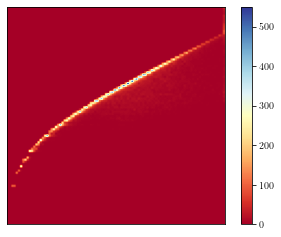

In [12]:
import lite.lite as li
global_min, global_max = (0,0), (3000,1000)
resolution, alpha = (100,100), (10000,100)
img = li.create_grid(dgm[1],resolution, global_max, global_min, alpha)
# img = li.create_grid(pd,(50,50),(0.004,0.002),(0,0),(100,5000))
plt.figure()
fig = plt.imshow(img,origin='lower',cmap='RdYlBu')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.colorbar()
plt.show()

In [13]:
nm_dt = 'K8'

In [14]:
import lite.lite as li
global_min, global_max = (0,0), (3000,1000)
resolution, alpha = (100,100), (10000,10000)

homological_degree = 1

qupids = {}

for nm in names_datasets[nm_dt]:
        dgm = diagrams[nm_dt][nm][homological_degree]
        img = li.create_grid(dgm,resolution, global_max, global_min, alpha)
        # plt.figure()
        # fig = plt.imshow(img,origin='lower',cmap='RdYlBu')
        # fig.axes.get_xaxis().set_visible(False)
        # fig.axes.get_yaxis().set_visible(False)
        # plt.colorbar()
        # plt.title(nm + 'for H_'+str(homological_degree))
        # plt.show()
        qupids[nm] = img


In [15]:
dim_reduc = PCA(n_components=2)
qupids_flattened = [img.flatten() for img in qupids.values()]
qupids_embedded = dim_reduc.fit_transform(qupids_flattened)

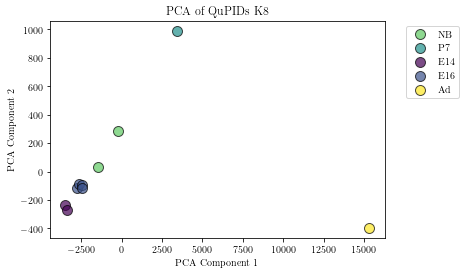

In [16]:
plt.figure()
for i, name in enumerate(names_datasets[nm_dt]):
    age = extract_age(name)
    plt.scatter(qupids_embedded[i, 0], qupids_embedded[i, 1], color=age_to_color[nm_dt][age], label=age, edgecolor='black', s=100, alpha=0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of QuPIDs '+nm_dt)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig(os.path.join('Results','PCA_Qupids_'+nm_dt+'.png'), dpi=400, bbox_inches='tight')
plt.show()

In [17]:
# Looking at non-trivial wavelets
wavelet = 'db3'
qupids = {}

for nm in names_datasets[nm_dt]:
        dgm = diagrams[nm_dt][nm][homological_degree]
        wav = li.wavelet_functional(dgm, resolution, global_max, global_min, wavelet, alpha)
        wavs = np.concatenate([np.concatenate([wav[1],wav[0]]), np.concatenate([wav[3],wav[2]])],axis=-1)
        qupids[nm] = wavs

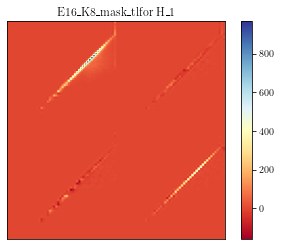

In [18]:
# plt.figure()
fig = plt.imshow(qupids['NB_K8_mask_r'],origin='lower',cmap='RdYlBu')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.colorbar()
plt.title(nm + 'for H_'+str(homological_degree))
plt.show()

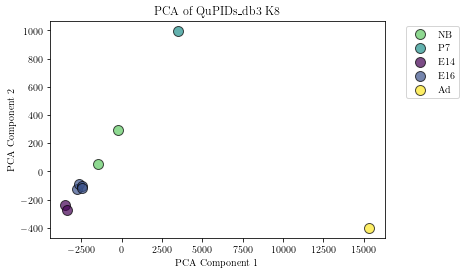

In [19]:
dim_reduc = PCA(n_components=2)
qupids_flattened = [img.flatten() for img in qupids.values()]
qupids_embedded = dim_reduc.fit_transform(qupids_flattened)

plt.figure()
for i, name in enumerate(names_datasets[nm_dt]):
    age = extract_age(name)
    plt.scatter(qupids_embedded[i, 0], qupids_embedded[i, 1], color=age_to_color[nm_dt][age], label=age, edgecolor='black', s=100, alpha = 0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of QuPIDs_'+wavelet+' '+nm_dt)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig(os.path.join('Results','PCA_Qupids_'+nm_dt+'.png'), dpi=400, bbox_inches='tight')
plt.show()

## Euler characteristic tools

In [22]:
import numpy as np
import gudhi as gd
from eulearning.eulearning.utils import vectorize_st

nm_dt = 'K8'
vec_sts = []
for nm in names_datasets['K8']:
	ac = gd.AlphaComplex(datasets[nm_dt][nm])						# Initialize the alpha complex
	st = ac.create_simplex_tree() 						# Compute the alpha filtration
	X_ = np.array([ac.get_point(i) for i in  range(st.num_vertices())]) 	# For technical reasons, computation of the alpha complex
										# may change the order of vertices
	vec_st = vectorize_st(st, filtrations=[])			# Vectorize the simplex tree
	vec_sts.append(vec_st)

#### Euler curves

In [48]:
from eulearning.eulearning.descriptors import EulerCharacteristicProfile

euler_curve = EulerCharacteristicProfile(resolution=(200,), quantiles=[(0, 0.95)], pt_cld=True, normalize=True)

# Compute Euler curves
eccs = euler_curve.fit_transform(vec_sts[0])

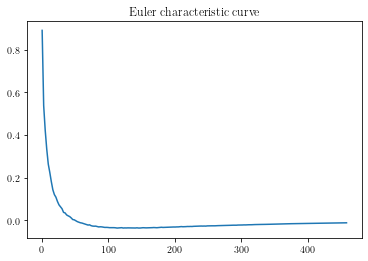

In [50]:
ecc = eccs
ecc_range = np.linspace(euler_curve.val_ranges[0][0], euler_curve.val_ranges[0][1], euler_curve.resolution[0])
plt.figure()
plt.plot(ecc_range, ecc)
plt.title('Euler characteristic curve')
plt.show()

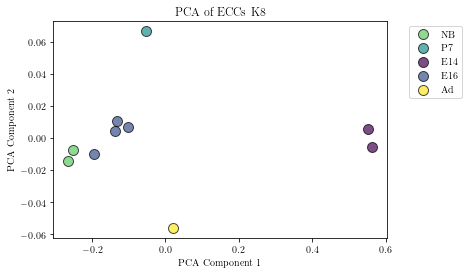

In [40]:
dim_reduc = PCA(n_components=2)
eccs_flattened = [img.flatten() for img in eccs]
eccs_embedded = dim_reduc.fit_transform(eccs_flattened)

plt.figure()
for i, name in enumerate(names_datasets[nm_dt]):
    age = extract_age(name)
    plt.scatter(eccs_embedded[i, 0], eccs_embedded[i, 1], color=age_to_color[nm_dt][age], label=age, edgecolor='black', s=100, alpha = 0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of ECCs '+nm_dt)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig(os.path.join('Results','PCA_ECCs_'+nm_dt+'.png'), dpi=400, bbox_inches='tight')
plt.show()

#### Hybrid transforms

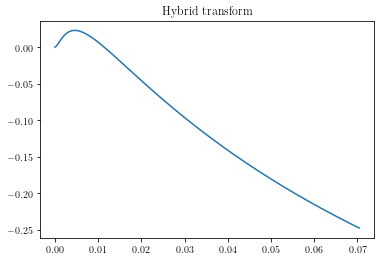

In [36]:
from eulearning.eulearning.descriptors import HybridTransform

kernel = 'exp_2'

hyb_trans = HybridTransform(resolution=(200,), quantiles=[0.5], kernel_name=kernel, pt_cld=True, normalize=True)

# # Compute hybrid transform
# ht = hyb_trans.fit_transform(vec_sts[0])

# # Plot hybrid transform
# ht_range = np.linspace(hyb_trans.val_ranges[0][0], hyb_trans.val_ranges[0][1], hyb_trans.resolution[0])
# plt.figure()
# plt.plot(ht_range, ht)
# plt.title('Hybrid transform')
# plt.show()

In [37]:
hts = hyb_trans.fit_transform(vec_sts)

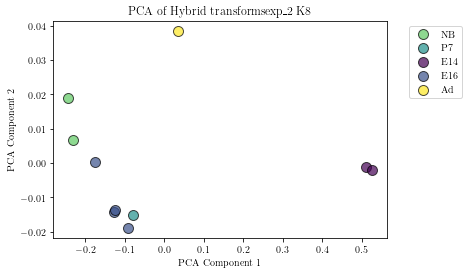

In [38]:
dim_reduc = PCA(n_components=2)
hts_flattened = [img.flatten() for img in hts]
hts_embedded = dim_reduc.fit_transform(hts_flattened)

plt.figure()
for i, name in enumerate(names_datasets[nm_dt]):
    age = extract_age(name)
    plt.scatter(hts_embedded[i, 0], hts_embedded[i, 1], color=age_to_color[nm_dt][age], label=age, edgecolor='black', s=100, alpha = 0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Hybrid transforms '+kernel+' '+nm_dt)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig(os.path.join('Results','PCA_HTs_'+name_kernel+' '+nm_dt+'.png'), dpi=400, bbox_inches='tight')
plt.show()

#### Euler characteristic surfaces

In [41]:
from eulearning.eulearning.utils import codensity

nm_dt = 'K8'
vec_sts = []
for nm in names_datasets['K8']:
	ac = gd.AlphaComplex(datasets[nm_dt][nm])						# Initialize the alpha complex
	st = ac.create_simplex_tree() 						# Compute the alpha filtration
	X_ = np.array([ac.get_point(i) for i in  range(st.num_vertices())]) 	# For technical reasons, computation of the alpha complex
										# may change the order of vertices
	codensity_filt = codensity(X_)						# Compute codensity of each point cloud
	vec_st = vectorize_st(st, filtrations=[codensity_filt])			# Vectorize the simplex tree
	vec_sts.append(vec_st)

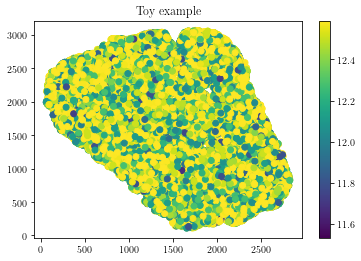

In [42]:
plt.figure()
plt.scatter(X_[:,0], X_[:,1], c=codensity_filt)
plt.colorbar()
plt.title('Toy example')
plt.show()

In [51]:
# ECPs are flatten by default to fit with sklearn classifiers. Set flatten=False to unflatten them.
euler_profile = EulerCharacteristicProfile(resolution=(30,30), val_ranges=[(0, 400), (11.6, 12.5)], pt_cld=True) 
ecps = euler_profile.fit_transform(vec_sts)

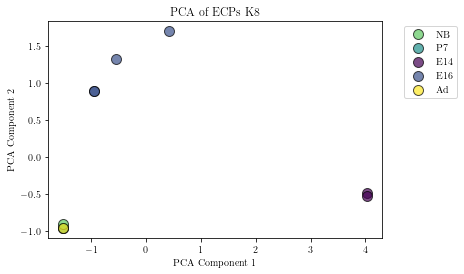

In [52]:
dim_reduc = PCA(n_components=2)
ecps_flattened = [img.flatten() for img in ecps]
ecps_embedded = dim_reduc.fit_transform(ecps_flattened)

plt.figure()
for i, name in enumerate(names_datasets[nm_dt]):
    age = extract_age(name)
    plt.scatter(ecps_embedded[i, 0], ecps_embedded[i, 1], color=age_to_color[nm_dt][age], label=age, edgecolor='black', s=100, alpha = 0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of ECPs '+nm_dt)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig(os.path.join('Results','PCA_ECPs_'+nm_dt+'.png'), dpi=400, bbox_inches='tight')
plt.show()